In [2]:

# 1. Importação das Bibliotecas Necessárias
import random

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

SEED = 42
random.seed(SEED)
np.random.seed(SEED)


In [3]:
# 2. Coleta de Dados Históricos dos Ativos
tickers = ['TAEE4.SA', 'VALE3.SA', 'VIVT3.SA', 'BBSE3.SA', 'BBAS3.SA']
start_date = '2020-01-01'
end_date = '2024-10-31'
data = yf.download(tickers, start=start_date, end=end_date, repair=False, )['Adj Close']

[*********************100%***********************]  5 of 5 completed


In [4]:
# 3. Cálculo dos Retornos Diários e Estatísticas
returns = data.pct_change()
mean_returns = returns.mean()
cov_matrix = returns.cov()

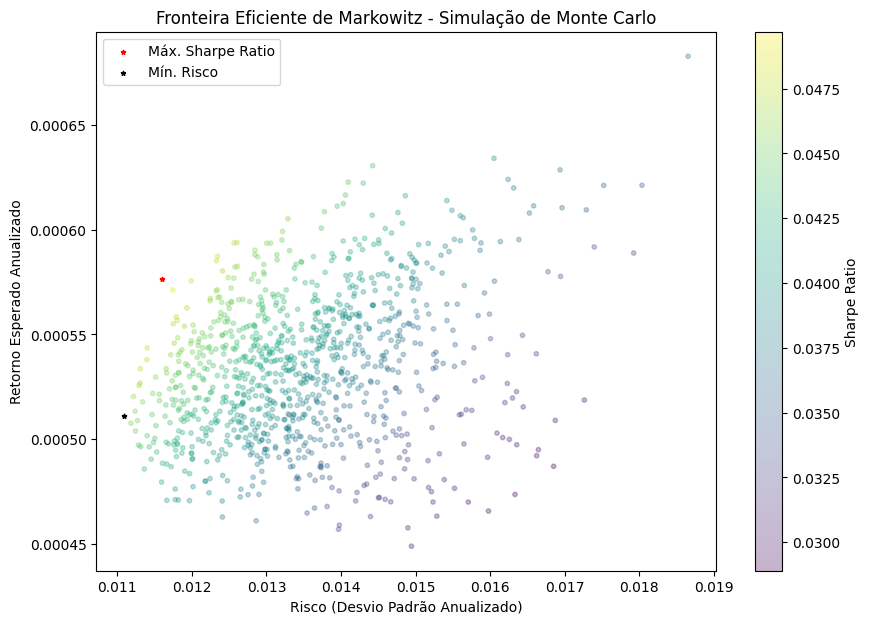

Pesos do Portfólio de Máximo Sharpe Ratio:
TAEE4.SA: 2.21%
VALE3.SA: 2.71%
VIVT3.SA: 59.71%
BBSE3.SA: 26.14%
BBAS3.SA: 9.22%

Pesos do Portfólio de Mínimo Risco:
TAEE4.SA: 5.31%
VALE3.SA: 12.26%
VIVT3.SA: 49.96%
BBSE3.SA: 7.21%
BBAS3.SA: 25.26%


In [5]:
# 4. Simulação de Portfólios Aleatórios
num_portfolios = 1000
results = np.zeros((3, num_portfolios))
all_weights = np.zeros((num_portfolios, len(tickers)))

for i in range(num_portfolios):
    # Gerar pesos aleatórios
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)

    # Calcula o retorno e risco do portfólio
    portfolio_return = np.dot(weights, mean_returns)
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

    # Armazena os resultados
    results[0,i] = portfolio_std_dev
    results[1,i] = portfolio_return
    results[2,i] = results[1,i] / results[0,i]

    # Armazena os pesos
    all_weights[i, :] = weights

# 5. Visualização da Fronteira Eficiente
results_frame = pd.DataFrame(results.T, columns=['Risco', 'Retorno', 'Sharpe'])
for i, ticker in enumerate(tickers):
    results_frame[ticker + '_weight'] = all_weights[:, i]

# Plotar os portfólios simulados
plt.figure(figsize=(10, 7))
plt.scatter(results_frame['Risco'], results_frame['Retorno'], c=results_frame['Sharpe'], cmap='viridis', marker='o', s=10, alpha=0.3)
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Risco (Desvio Padrão Anualizado)')
plt.ylabel('Retorno Esperado Anualizado')
plt.title('Fronteira Eficiente de Markowitz - Simulação de Monte Carlo')

# 6. Encontrar os Portfólios Ótimos
max_sharpe_idx = results_frame['Sharpe'].idxmax()
max_sharpe_port = results_frame.iloc[max_sharpe_idx]
min_risk_idx = results_frame['Risco'].idxmin()
min_risk_port = results_frame.iloc[min_risk_idx]

# Plotar os portfólios ótimos
plt.scatter(max_sharpe_port['Risco'], max_sharpe_port['Retorno'], marker='*', color='r', s=10, label='Máx. Sharpe Ratio')
plt.scatter(min_risk_port['Risco'], min_risk_port['Retorno'], marker='*', color='black', s=10, label='Mín. Risco')
plt.legend()
plt.show()

# 7. Análise dos Pesos dos Portfólios Ótimos
print("Pesos do Portfólio de Máximo Sharpe Ratio:")
for i, ticker in enumerate(tickers):
    print(f"{ticker}: {max_sharpe_port[ticker + '_weight']:.2%}")

print("\nPesos do Portfólio de Mínimo Risco:")
for i, ticker in enumerate(tickers):
    print(f"{ticker}: {min_risk_port[ticker + '_weight']:.2%}")

In [6]:
max_sharpe_idx, min_risk_idx, results_frame.shape

(58, 255, (1000, 8))

In [7]:
print(mean_returns.sort_index())
print(cov_matrix.sort_index())

Ticker
BBAS3.SA    0.000519
BBSE3.SA    0.000402
TAEE4.SA    0.000523
VALE3.SA    0.000759
VIVT3.SA    0.000468
dtype: float64
Ticker    BBAS3.SA  BBSE3.SA  TAEE4.SA  VALE3.SA  VIVT3.SA
Ticker                                                    
BBAS3.SA  0.000551  0.000217  0.000105  0.000222  0.000143
BBSE3.SA  0.000217  0.000282  0.000072  0.000111  0.000098
TAEE4.SA  0.000105  0.000072  0.000168  0.000033  0.000069
VALE3.SA  0.000222  0.000111  0.000033  0.000568  0.000086
VIVT3.SA  0.000143  0.000098  0.000069  0.000086  0.000292


In [8]:
cov_matrix

Ticker,BBAS3.SA,BBSE3.SA,TAEE4.SA,VALE3.SA,VIVT3.SA
Ticker,,,,,
BBAS3.SA,0.000551,0.000217,0.000105,0.000222,0.000143
BBSE3.SA,0.000217,0.000282,0.000072,0.000111,0.000098
TAEE4.SA,0.000105,0.000072,0.000168,0.000033,0.000069
VALE3.SA,0.000222,0.000111,0.000033,0.000568,0.000086
VIVT3.SA,0.000143,0.000098,0.000069,0.000086,0.000292


In [9]:
mean_returns

Ticker
BBAS3.SA    0.000519
BBSE3.SA    0.000402
TAEE4.SA    0.000523
VALE3.SA    0.000759
VIVT3.SA    0.000468
dtype: float64

In [14]:
data.pct_change().dropna()

Ticker,BBAS3.SA,BBSE3.SA,TAEE4.SA,VALE3.SA,VIVT3.SA
Date,,,,,
2020-01-03 00:00:00+00:00,-0.001673,-0.011024,-0.011506,-0.007362,0.011609
2020-01-06 00:00:00+00:00,-0.013219,0.016454,0.003880,-0.005934,-0.009631
2020-01-07 00:00:00+00:00,-0.007547,0.000522,-0.015459,0.007275,0.022139
2020-01-08 00:00:00+00:00,-0.009126,-0.000522,-0.012758,0.000185,0.010122
2020-01-09 00:00:00+00:00,-0.020338,-0.002872,0.000994,-0.013146,-0.016834
...,...,...,...,...,...
2024-10-24 00:00:00+00:00,0.001139,0.001166,-0.001739,0.005897,0.001863
2024-10-25 00:00:00+00:00,0.000379,-0.001746,0.000000,0.034003,-0.006323
2024-10-28 00:00:00+00:00,-0.001896,0.002332,0.001742,0.018630,0.008048


In [11]:
data

Ticker,BBAS3.SA,BBSE3.SA,TAEE4.SA,VALE3.SA,VIVT3.SA
Date,,,,,
2020-01-02 00:00:00+00:00,19.716356,25.210369,6.812360,35.130035,35.751736
2020-01-03 00:00:00+00:00,19.683374,24.932461,6.733980,34.871391,36.166767
2020-01-06 00:00:00+00:00,19.423174,25.342705,6.760107,34.664478,35.818455
2020-01-07 00:00:00+00:00,19.276585,25.355936,6.655603,34.916653,36.611443
2020-01-08 00:00:00+00:00,19.100674,25.342705,6.570693,34.923119,36.982010
...,...,...,...,...,...
2024-10-24 00:00:00+00:00,26.360001,34.360001,11.480000,59.700001,53.770000
2024-10-25 00:00:00+00:00,26.370001,34.299999,11.480000,61.730000,53.430000
2024-10-28 00:00:00+00:00,26.320000,34.380001,11.500000,62.880001,53.860001
